<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project4/Problem1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting the upload of data

In [1]:
# importing
import pandas as pd
import matplotlib.pyplot as plt

# csv file variable
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv"

# reading the data
df = pd.read_csv(url)


Sex and workclass contingency table

In [3]:
# create contingency table
c_table = pd.crosstab(df['workclass'], df['sex'])

# print contingency table
print(c_table)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


Sex and marital status contingency table

In [7]:
# create contingency table
c_table = pd.crosstab(df['sex'], df['marital-status'])

# print contingency table
print(c_table)

marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female              1219                  7                 761   
Male                 795                  4                6010   

marital-status  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                       
Female                             95           2160        290      380  
Male                              104           2717        182       73  


Creating adult over 40 data frame


In [8]:
adultOver40 = df[df['age'] > 40]

Recreating contingency table with adult over 40

In [9]:
# create contingency table
c_table = pd.crosstab(adultOver40['sex'], adultOver40['marital-status'])

# print contingency table
print(c_table)

marital-status  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                   
Female               720                 305                     38   
Male                 448                3383                     47   

marital-status  Never-married  Separated  Widowed  
sex                                                
Female                    256        133      354  
Male                      315         74       71  


Determining whether there are outliers in education:

As you can see, there is points outside of the whiskers so there are outliers in the education column.

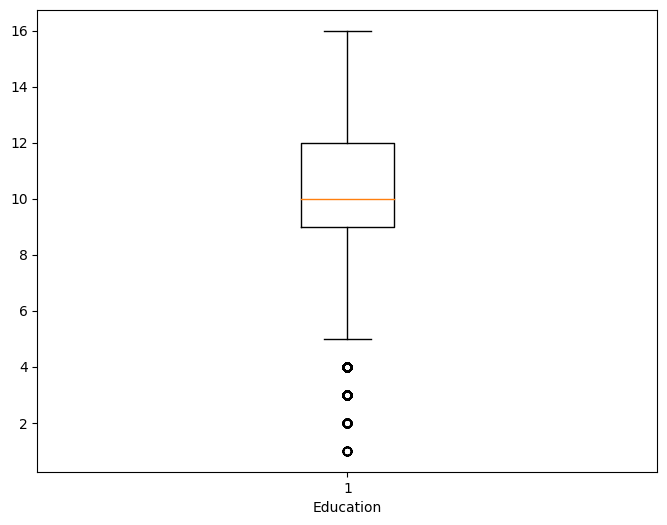

In [12]:
education_data = df['education']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(education_data, vert=True)
plt.xlabel('Education')
plt.show()

Standardizing (zero mean) the age variable, and identifying how many outliers there are.

As you can see, there are 60 outliers from the 3 standard deviation method, and the most extreme is 90 years old.

In [14]:
age_data = df['age']

# standardize age
mean_age = age_data.mean()
std_dev_age = age_data.std()
standardized_age = (age_data - mean_age) / std_dev_age

# 3 standard deviations
threshold = 3

# identify outliers
outliers = age_data[(standardized_age < -threshold) | (standardized_age > threshold)]

# print
print("Number of outliers:", len(outliers))
print("Most extreme outlier:", age_data[outliers.idxmax()])

Number of outliers: 60
Most extreme outlier: 90


Histogram with age anomaly of 80+

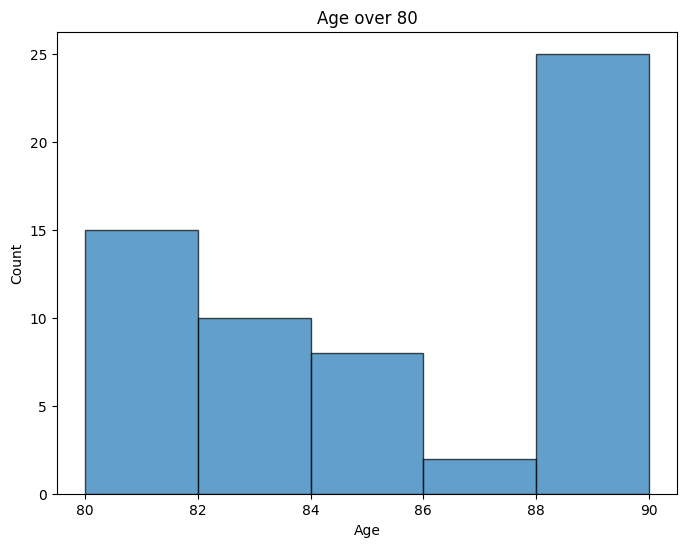

In [16]:
# creating the 80+ df
eighty = df[df['age'] >= 80]

# histogram of age 80+
plt.figure(figsize=(8, 6))
plt.hist(eighty['age'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age over 80')
plt.show()

From the histogram, I was able to see the frequency of people with ages over 80. Tied for the most frequent were the age groups of 80-82 and 88-90. In between those groups, there are not nearly as many people. The outlier of 90 is also shown in this histogram.